In [0]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

**Since new version for Tensorflow is available so we import the backend data and new files for v2(version 2) into v1(version 1)**

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Reading data from the CSV file using dataframe

In [41]:
df = pd.read_csv('../spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Dropping the outliers or unecessary empty data points

In [42]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


# Creating the plot for the categories

Text(0.5, 1.0, 'Number of ham and spam messages')

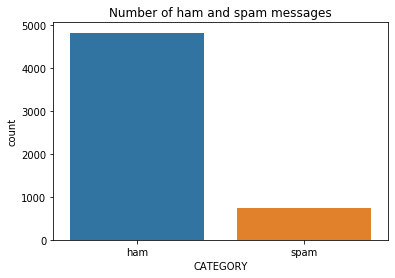

In [43]:

sns.countplot(df.v1)
plt.xlabel('CATEGORY')
plt.title('Number of ham and spam messages')

**Labeling and creating Input and Output vectors**

In [0]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

**Data splitting into test and train**

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

# Data processing 
* Tokenize the data
* Padding 

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# RNN (Since LSTM is a type of LSTM)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

**Model Compiling**

In [48]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

**Data Fitting**

In [49]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3397 - acc: 0.8633 - val_loss: 0.1686 - val_acc: 0.9789
Epoch 2/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0918 - acc: 0.9773 - val_loss: 0.0384 - val_acc: 0.9947
Epoch 3/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0466 - acc: 0.9863 - val_loss: 0.0275 - val_acc: 0.9937
Epoch 4/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0336 - acc: 0.9900 - val_loss: 0.0280 - val_acc: 0.9905


**This runs for Epoch 4/10 but showing some v1 tensorflow backend warnings ,When we run the import v2 in v1 command then this reduces to Epoch 2/10-3/10**

**Test data processing**

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

**Test data evaluation**

In [51]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 674us/step


# **Print the fianl result**

In [52]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.066
  Accuracy: 0.983
